In [7]:
from pathlib import Path
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
sample_rate = 48000

N = 128
hop_size = 64
window = np.hanning(N)

start =13500
end = 14500

In [9]:
i = "results/48k/test/gcn-250_20230824-224525_20230825_224119/inp_gcn-250.wav"
o = "results/48k/test/gcn-250_20230824-224525_20230825_224119/out_gcn-250.wav"
t = "results/48k/test/gcn-250_20230824-224525_20230825_224119/tgt_gcn-250.wav"

In [13]:
i_sr, i_p = wavfile.read(i)
o_sr, o_p = wavfile.read(o)
t_sr, t_p = wavfile.read(t)


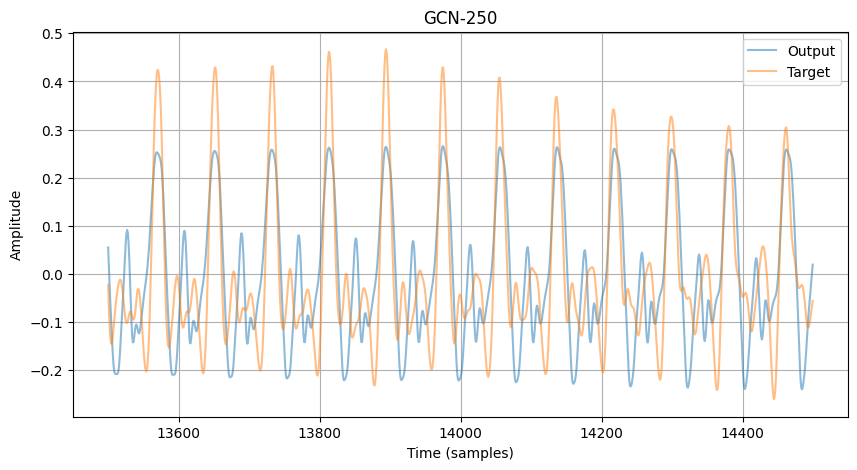

In [14]:
# make sure your waveforms are numpy arrays
i_zoom = i_p[start:end]
o_zoom = o_p[start:end]
t_zoom = t_p[start:end]

# create time vector
time = range(start, end)

plt.figure(figsize=(10,5))
# plt.plot(time, i_zoom, alpha=0.5, label="Input", color="red")
plt.plot(time, o_zoom, alpha=0.5, label="Output")
plt.plot(time, t_zoom, alpha=0.5, label="Target")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("GCN-250")
plt.legend()
plt.grid()
plt.show()

In [17]:
_, i_wn = wavfile.read("results/48k/test/wavenet-24_20230825-003730_20230825_230850/inp_wavenet-24.wav")
_, o_wn = wavfile.read("results/48k/test/wavenet-24_20230825-003730_20230825_230850/out_wavenet-24.wav")
_, t_wn = wavfile.read("results/48k/test/wavenet-24_20230825-003730_20230825_230850/tgt_wavenet-24.wav")

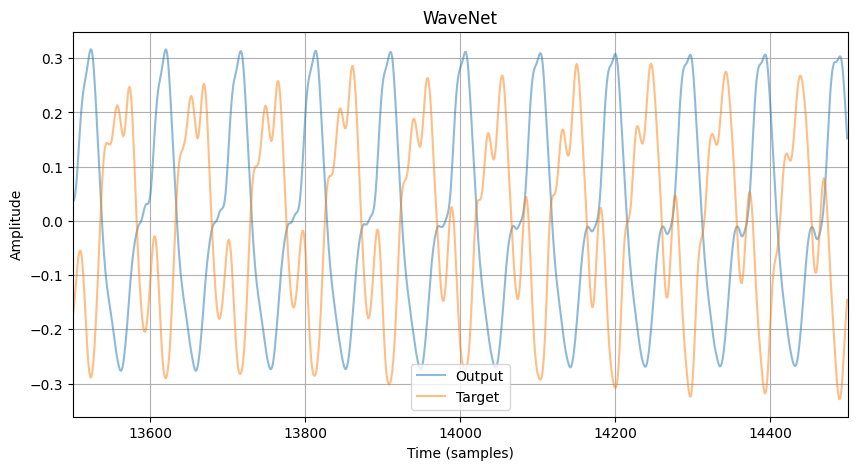

In [18]:
# # make sure your waveforms are numpy arrays
i_zoom = i_wn[start:end]
o_zoom = o_wn[start:end]
t_zoom = t_wn[start:end]

# create time vector
time = range(start, end)

plt.figure(figsize=(10,5))
# plt.plot(time, i_zoom, alpha=0.5, label="Input", color="red")
plt.plot(time, o_zoom, alpha=0.5, label="Output")
plt.plot(time, t_zoom, alpha=0.5, label="Target")
plt.xlim(start, end)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("WaveNet")
plt.legend()
plt.grid()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

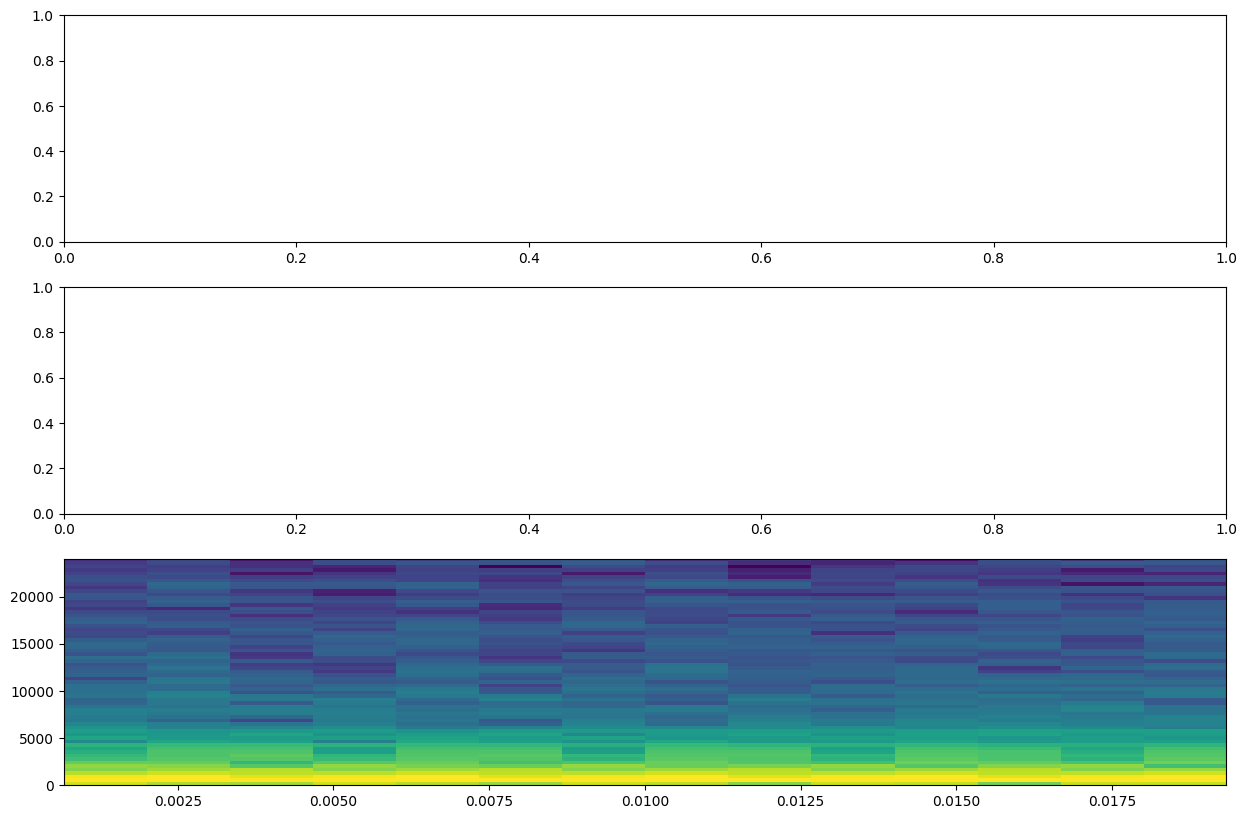

In [28]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Setting sample rate and STFT parameters
sample_rate = 48000
n_fft_value = 512  # Adjust as needed for frequency resolution
hop_length_value = 128  # Adjust as needed for time resolution


Pxx_o, freqs_o, t_o, _= plt.specgram(o_zoom, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB')
spec = Pxx_o
im = axs.imshow(power_to_db(spec), origin='lower', aspect=aspect, vmin=db_range[0], vmax=db_range[1])
if xmax:
    axs.set_xlim((0, xmax))
if justimage:
    axs.axis('off')
    plt.tight_layout()
else: 
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    axs.set_title(title or 'Spectrogram (dB)')
    fig.colorbar(im, ax=axs)
canvas.draw()
rgba = np.asarray(canvas.buffer_rgba())
im = Image.fromarray(rgba)
if justimage: # remove tiny white border
    b = 15 # border size 
    im = im.crop((b,b, im.size[0]-b, im.size[1]-b))
    #print(f"im.size = {im.size}")

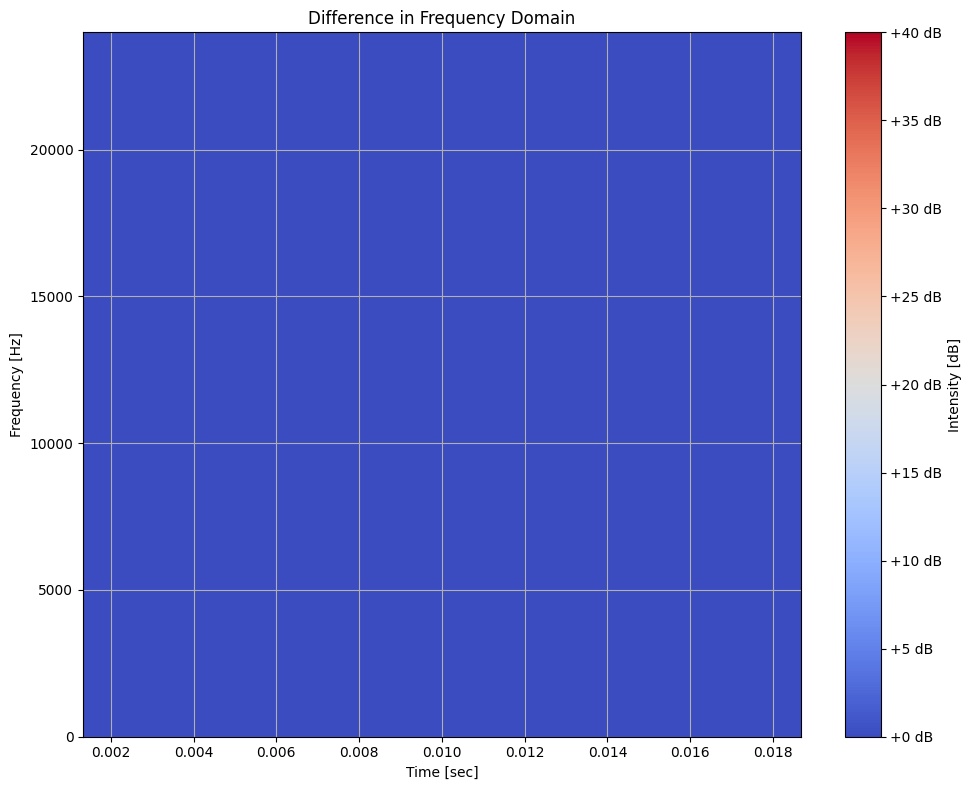

In [19]:
# 1. Compute the STFT for both signals
Pxx_o, freqs_o, t_o, _= plt.specgram(o_zoom, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB')
Pxx_t, freqs_t, t_t, _ = plt.specgram(t_zoom, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB')
plt.close()
# 2. Subtract one spectrogram from the other
# difference = 10 * np.log10(Pxx_t + 1e-7) - 10 * np.log10(Pxx_o + 1e-7)  # Convert to dB and then subtract

difference = Pxx_o - Pxx_t

# 3. Plot the difference
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_o[0], t_o[-1], freqs_o[0], freqs_o[-1]], vmin=0, vmax=40)
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

In [ ]:
i_tcn, _ = librosa.load("results/48k/test/tcn-4000_20230825-111109_20230825_225352/inp_tcn-4000.wav", sr=48000)
o_tcn, _ = librosa.load("results/48k/test/tcn-4000_20230825-111109_20230825_225352/out_tcn-4000.wav", sr=48000)
t_tcn, _ = librosa.load("results/48k/test/tcn-4000_20230825-111109_20230825_225352/tgt_tcn-4000.wav", sr=48000)

In [ ]:
# make sure your waveforms are numpy arrays
i_zoom = i_tcn[start:end]
o_zoom = o_tcn[start:end]
t_zoom = t_tcn[start:end]

# create time vector
time = range(start, end)

plt.figure(figsize=(10,5))
# plt.plot(time, i_zoom, alpha=0.5, label="Input", color="red")
plt.plot(time, o_zoom, alpha=0.5, label="Output")
plt.plot(time, t_zoom, alpha=0.5, label="Target")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("TCN-4000")
plt.legend()
plt.grid()
plt.show()

In [ ]:
i_lstm32, _ = librosa.load("results/48k/test/lstm-cs-32_20230825-001333_20230825_224618/inp_lstm-cs-32.wav", sr=48000)
o_lstm32, _ = librosa.load("results/48k/test/lstm-cs-32_20230825-001333_20230825_224618/out_lstm-cs-32.wav", sr=48000)
t_lstm32, _ = librosa.load("results/48k/test/lstm-cs-32_20230825-001333_20230825_224618/tgt_lstm-cs-32.wav", sr=48000)

In [ ]:
# make sure your waveforms are numpy arrays
i_zoom = i_lstm32[start:end]
o_zoom = o_lstm32[start:end]
t_zoom = t_lstm32[start:end]

# create time vector
time = range(start, end)

plt.figure(figsize=(10,5))
# plt.plot(time, i_zoom, alpha=0.5, label="Input", color="red")
plt.plot(time, o_zoom, alpha=0.5, label="Output")
plt.plot(time, t_zoom, alpha=0.5, label="Target")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("LSTM-CS-32")
plt.legend()
plt.grid()
plt.show()

In [ ]:
i_lstm, _ = librosa.load("results/48k/test/lstm-cs-96_20230825-151911_20230825_224850/inp_lstm-cs-96.wav", sr=48000)
o_lstm, _ = librosa.load("results/48k/test/lstm-cs-96_20230825-151911_20230825_224850/out_lstm-cs-96.wav", sr=48000)
t_lstm, _ = librosa.load("results/48k/test/lstm-cs-96_20230825-151911_20230825_224850/tgt_lstm-cs-96.wav", sr=48000)

In [ ]:
# make sure your waveforms are numpy arrays
i_zoom = i_lstm[start:end]
o_zoom = o_lstm[start:end]
t_zoom = t_lstm[start:end]

# create time vector
time = range(start, end)

plt.figure(figsize=(10,5))
# plt.plot(time, i_zoom, alpha=0.5, label="Input", color="red")
plt.plot(time, o_zoom, alpha=0.5, label="Output")
plt.plot(time, t_zoom, alpha=0.5, label="Target")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("LSTM-CS-96")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute the STFT for both signals
Pxx_o, freqs_o, t_o, _= plt.specgram(o_lstm, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB')
Pxx_t, freqs_t, t_t, _ = plt.specgram(t_lstm, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB')
plt.close()
# 2. Subtract one spectrogram from the other
# difference = 10 * np.log10(Pxx_t + 1e-7) - 10 * np.log10(Pxx_o + 1e-7)  # Convert to dB and then subtract

difference = Pxx_o - Pxx_t

# 3. Plot the difference
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_o[0], t_o[-1], freqs_o[0], freqs_o[-1]], vmin=0, vmax=40)
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

time_axis = np.arange(len(o_zoom)) / sample_rate

# Plot the spectrogram
spec_o, freq, t, im = ax.specgram(o_lstm, Fs=sample_rate, window=window, NFFT=N, noverlap=hop_size, cmap='hot', scale='dB', vmin=-80,vmax=-20, mode='psd')
spec_t, freq, t, im = ax.specgram(t_lstm, Fs=sample_rate, window=window, NFFT=N, noverlap=hop_size, cmap='hot', scale='dB', vmin=-80,vmax=-20, mode='psd')

diff = spec_t - spec_o

ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid(True)

# Add the colorbar
cbar = fig.colorbar(mappable=cax[3], ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()


In [ ]:
def plot_compare_spectrogram(target, output, sample_rate, title, t_label="Target", o_label="Output", xlim=None, ylim=None): 
    n_fft = 2048
    hop_length = 64
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    
    t_spec = librosa.amplitude_to_db(np.abs(librosa.stft(target)), ref=np.max)
    o_spec = librosa.amplitude_to_db(np.abs(librosa.stft(output)), ref=np.max)

    diff = t_spec - o_spec

    axs[0].set_title(t_label or "Target Spectrogram (db)")
    img1 = librosa.display.specshow(
        diff, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, x_axis="time", y_axis="log", ax=axs[0], cmap="gray_r", robust=True)
    fig.colorbar(img1, ax=axs[0], format="%+2.f dB")

    axs[1].set_title(o_label or "Output Spectrogram (db)")
    img2 = librosa.display.specshow(
        o_spec, sr=sample_rate, n_fft=n_fft, hop_length=hop_length,  x_axis="time", y_axis="log", ax=axs[1])
    fig.colorbar(img2, ax=axs[1], format="%+2.f dB")
    
    plt.tight_layout()
    # plt.show(block=False)

    
plot_compare_spectrogram(t_zoom, o_zoom, 48000, "TCN-4000", t_label="Target", o_label="Output", xlim=0, ylim=0.1)

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Setting sample rate and STFT parameters
sample_rate = 48000
n_fft_value = 4096  # Adjust as needed for frequency resolution
hop_length_value = 128  # Adjust as needed for time resolution

fig = Figure(figsize=figsize, dpi=100) if not justimage else Figure(figsize=(4.145, 4.145), dpi=100, tight_layout=True)
    canvas = FigureCanvasAgg(fig)
    axs = fig.add_subplot()
    spec = spec.squeeze()
    im = axs.imshow(power_to_db(spec), origin='lower', aspect=aspect, vmin=db_range[0], vmax=db_range[1])
    if xmax:
        axs.set_xlim((0, xmax))
    if justimage:
        axs.axis('off')
        plt.tight_layout()
    else: 
        axs.set_ylabel(ylabel)
        axs.set_xlabel('frame')
        axs.set_title(title or 'Spectrogram (dB)')
        fig.colorbar(im, ax=axs)
    canvas.draw()
    rgba = np.asarray(canvas.buffer_rgba())
    im = Image.fromarray(rgba)
    if justimage: # remove tiny white border
        b = 15 # border size 
        im = im.crop((b,b, im.size[0]-b, im.size[1]-b))
        #print(f"im.size = {im.size}")


In [ ]:
# dirac = signal.unit_impulse(10, 'mid')

In [ ]:
recorded, sr = librosa.load("audio/proc/gcn-250_IR.wav")

In [ ]:
def plot_impulse_with_zoom(data, sample_rate, zoom_factor=0.01):
    """
    Plot the waveform and zoom in on the impulse.

    Parameters:
    - data: The impulse signal data.
    - sample_rate: The sample rate of the data.
    - zoom_factor: The fraction of the total duration to show around the impulse.
    """

    # Identify where the impulse is (find the sample with the highest absolute amplitude)
    impulse_index = np.argmax(np.abs(data))

    # Compute the number of samples to show around the impulse for zooming
    samples_to_show = int(sample_rate * zoom_factor)

    # Define start and end indices for the zoomed view
    start_index = max(0, impulse_index - samples_to_show // 2)
    end_index = min(len(data) - 1, impulse_index + samples_to_show // 2)

    # Create plots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    # Full waveform
    axs[0].plot(data)
    axs[0].set_title("Full Waveform")
    axs[0].set_xlabel("Samples")
    axs[0].set_ylabel("Amplitude")

    # Zoomed-in waveform
    axs[1].plot(range(start_index, end_index), data[start_index:end_index])
    axs[1].set_title("Zoomed-In on Impulse")
    axs[1].set_xlabel("Samples")
    axs[1].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# Test with the impulse signal from the previous code snippet
plot_impulse_with_zoom(recorded, sample_rate)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

def plot_impulse_and_spectrogram(data, sample_rate, zoom_factor=0.01):
    """
    Plot the waveform, zoom in on the impulse, and display its traditional spectrogram.

    Parameters:
    - data: The impulse signal data.
    - sample_rate: The sample rate of the data.
    - zoom_factor: The fraction of the total duration to show around the impulse.
    """

    # Identify where the impulse is (find the sample with the highest absolute amplitude)
    impulse_index = np.argmax(np.abs(data))

    # Compute the number of samples to show around the impulse for zooming
    samples_to_show = int(sample_rate * zoom_factor)

    # Define start and end indices for the zoomed view
    start_index = max(0, impulse_index - samples_to_show // 2)
    end_index = min(len(data) - 1, impulse_index + samples_to_show // 2)

    # Extract zoomed data
    zoomed_data = data[start_index:end_index]

    # Compute the spectrogram of the zoomed data
    f, t, Sxx = spectrogram(zoomed_data, fs=sample_rate)

    # Create plots
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    # Full waveform
    axs[0].plot(data)
    axs[0].set_title("Full Waveform")
    axs[0].set_xlabel("Samples")
    axs[0].set_ylabel("Amplitude")

    # Zoomed-in waveform
    axs[1].plot(range(start_index, end_index), zoomed_data)
    axs[1].set_title("Zoomed-In on Impulse")
    axs[1].set_xlabel("Samples")
    axs[1].set_ylabel("Amplitude")

    # Traditional spectrogram
    cmap = plt.get_cmap('inferno')
    min_magnitude = 10 * np.log10(np.min(Sxx))
    max_magnitude = 10 * np.log10(np.max(Sxx))
    for i in range(len(t)):
        magnitudes = 10 * np.log10(Sxx[:, i])
        normalized = (magnitudes - min_magnitude) / (max_magnitude - min_magnitude)
        colors = cmap(normalized)
        axs[2].vlines(t[i], f[0], f[-1], colors=colors, lw=2, linestyles='solid')
        
    axs[2].set_title("Spectrogram")
    axs[2].set_ylabel("Frequency [Hz]")
    axs[2].set_xlabel("Time [sec]")

    plt.tight_layout()
    plt.show()

# Replace the following with your actual data and sample rate.
plot_impulse_and_spectrogram(o_zoom, 48000)


In [3]:
import torchaudio
torchaudio.backend.soundfile_backend.info("audio/gen/BX20_ableton.wav")